In [ ]:
# # Dữ liệu huấn luyện

# !gdown "https://drive.google.com/file/d/1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC/view?usp=sharing" --fuzzy -O /content/data_train.zip

# # Dữ liệu kiểm tra
# !gdown "https://drive.google.com/file/d/1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7/view?usp=sharing" --fuzzy -O /content/data_test.zip

Downloading...
From (original): https://drive.google.com/uc?id=1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC
From (redirected): https://drive.google.com/uc?id=1eIoqHANvHUqb0MxkBb4vEw5TmzOAoFgC&confirm=t&uuid=12568d9f-6fb5-473e-bef0-93da9abf3655
To: /content/data_train.zip
100% 60.2M/60.2M [00:01<00:00, 36.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7
From (redirected): https://drive.google.com/uc?id=1a6NGdaHKFzSvljhSWofPiL4NVDbzn_a7&confirm=t&uuid=338b7107-33df-4197-bba4-6e3333679aef
To: /content/data_test.zip
100% 312M/312M [00:02<00:00, 116MB/s]


In [ ]:
# # Giải nén dữ liệu huấn luyện
# !unzip "/content/data_train.zip" -d "/content/data_train"

# # Giải nén dữ liệu kiểm tra
# !unzip "/content/data_test.zip" -d "/content/data_test"


Archive:  /content/data_train.zip
   creating: /content/data_train/images/
  inflating: /content/data_train/images/IMG_0001.jpg  
  inflating: /content/data_train/images/IMG_0002.jpg  
  inflating: /content/data_train/images/IMG_0003.jpg  
  inflating: /content/data_train/images/IMG_0004.jpg  
  inflating: /content/data_train/images/IMG_0005.jpg  
  inflating: /content/data_train/images/IMG_0006.jpg  
  inflating: /content/data_train/images/IMG_0007.jpg  
  inflating: /content/data_train/images/IMG_0008.jpg  
  inflating: /content/data_train/images/IMG_0009.jpg  
  inflating: /content/data_train/images/IMG_0010.jpg  
  inflating: /content/data_train/images/IMG_0011.jpg  
  inflating: /content/data_train/images/IMG_0012.jpg  
  inflating: /content/data_train/images/IMG_0013.jpg  
  inflating: /content/data_train/images/IMG_0014.jpg  
  inflating: /content/data_train/images/IMG_0015.jpg  
  inflating: /content/data_train/images/IMG_0016.jpg  
  inflating: /content/data_train/images/IMG_0

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kHpyhAFP3XR7pqgXxN2D")
project = rf.workspace("trienchill").project("ai-uit-2")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AI-UIT-2-1 in yolov8:: 100%|██████████| 3976/3976 [00:01<00:00, 3694.85it/s]


## **Kiểm tra dữ liệu**
- Kiểm tra độ sáng, chất lượng dữ liệu
- Kiểm tra gắn nhãn dữ liệu của Ban tổ chức


In [2]:
import random
from pathlib import Path
from PIL import Image, ImageDraw

# Đường dẫn tới thư mục chứa ảnh
path_data = Path("/content/AI-UIT-2-1/train/images")
list_imgs_path = list(path_data.iterdir())

# Chọn ngẫu nhiên 3 ảnh để vẽ bounding box từ Ban tổ chức cung cấp
imgs_visualize = random.sample(list_imgs_path, 3)


for img_path in imgs_visualize:
     # Mở và lấy kích thước ảnh gốc
    img = Image.open(img_path)
    width, height = img.size
    img.resize((200, 400), Image.Resampling.LANCZOS)

    # Đọc file nhãn của ảnh
    label_path = img_path.parent.parent / 'labels' / (img_path.stem + '.txt')
    bounding_boxs = open(label_path, "r").readlines()

    for bbox in bounding_boxs:
        x, y, w, h = map(float, bbox.split()[1:])

        x_min = x - w / 2
        y_min = y - h / 2
        x_max = x + w / 2
        y_max = y + h / 2

        print(x_min, y_min, x_max, y_max)

        img1 = ImageDraw.Draw(img)
        img1.rectangle([(int(x_min * width), int(y_min * height)), (int(x_max * width), int(y_max * height))], outline="red")

    display(img)

ValueError: too many values to unpack (expected 4)

## Code to Convert YOLO to COCO Format

Explanation:
1. Input:

  * Images and YOLO label files are stored under data_train, data_val, and data_test.
2. Output:

  * annotations/train.json: Contains image and annotation information for training data.
  * annotations/val.json: Contains image and annotation information for validation data.
  * annotations/test.json: Contains image and annotation information for test data.
  * Images are organized into train/, val/, and test/ folders.
3. COCO JSON Structure:

  * images: Metadata for each image (id, file_name, width, height).
annotations: Bounding box information (id, image_id, category_id, bbox, etc.).
  * categories: Class mapping (id, name, supercategory).
4. Bounding Box Conversion:

  * YOLO: [class, x_center, y_center, width, height] (normalized).
  * COCO: [x_min, y_min, width, height] (absolute pixel values).

In [ ]:
import os
import json
from PIL import Image

def yolo_to_coco(data_dir, output_dir):
    # Create COCO dataset structure
    os.makedirs(os.path.join(output_dir, "annotations"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "train"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "val"), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "test"), exist_ok=True)

    # Helper functions
    def create_coco_json():
        return {
            "images": [],
            "annotations": [],
            "categories": []
        }

    def add_image_info(coco_data, img_id, file_name, width, height):
        coco_data["images"].append({
            "id": img_id,
            "file_name": file_name,
            "width": width,
            "height": height
        })

    def add_annotation_info(coco_data, annotation_id, img_id, category_id, bbox):
        x_min, y_min, width, height = bbox
        coco_data["annotations"].append({
            "id": annotation_id,
            "image_id": img_id,
            "category_id": category_id,
            "bbox": [x_min, y_min, width, height],
            "area": width * height,
            "iscrowd": 0
        })

    def add_categories(coco_data, classes):
        for i, class_name in enumerate(classes):
            coco_data["categories"].append({
                "id": i,
                "name": class_name,
                "supercategory": "none"
            })

    # Define datasets
    datasets = {
        "train": os.path.join(data_dir, "data_train"),
        "val": os.path.join(data_dir, "data_val"),
        "test": os.path.join(data_dir, "data_test")
    }

    # Category mapping (update as per your class labels)
    classes = ["class_0"]  # Add your class names
    category_map = {i: i for i in range(len(classes))}

    # Process each dataset
    for split, path in datasets.items():
        if not os.path.exists(path):
            continue

        coco_data = create_coco_json()
        add_categories(coco_data, classes)
        annotation_id = 1
        img_id = 1

        images_dir = os.path.join(path, "images")
        labels_dir = os.path.join(path, "labels")

        for img_file in os.listdir(images_dir):
            if not img_file.endswith(('.jpg', '.png', '.jpeg')):
                continue

            # Image file details
            img_path = os.path.join(images_dir, img_file)
            img = Image.open(img_path)
            width, height = img.size

            # Add image information to COCO
            new_img_path = os.path.join(output_dir, split, img_file)
            add_image_info(coco_data, img_id, img_file, width, height)
            img.save(new_img_path)  # Copy image to target location

            # Process corresponding label file
            label_file = os.path.join(labels_dir, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))
            if os.path.exists(label_file):
                with open(label_file, "r") as f:
                    for line in f.readlines():
                        class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.split())
                        category_id = category_map[int(class_id)]

                        # Convert YOLO bbox to COCO format
                        x_min = (x_center - bbox_width / 2) * width
                        y_min = (y_center - bbox_height / 2) * height
                        bbox_width = bbox_width * width
                        bbox_height = bbox_height * height

                        add_annotation_info(
                            coco_data, annotation_id, img_id, category_id,
                            [x_min, y_min, bbox_width, bbox_height]
                        )
                        annotation_id += 1

            img_id += 1

        # Save COCO JSON
        with open(os.path.join(output_dir, "annotations", f"{split}.json"), "w") as f:
            json.dump(coco_data, f, indent=4)

# Paths
source_directory = "/content"
destination_directory = "/content/Dataset"

# Convert
yolo_to_coco(source_directory, destination_directory)


## Generate data.yaml File
Here is a script to create the data.yaml automatically:

## **Huấn luyện dữ liệu bằng mô hình**

In [ ]:
!pip install torchmetrics
!pip install albumentations
!pip install --upgrade gdowna

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        """
        Args:
            image_dir (str): Thư mục chứa tất cả các ảnh và mask.
            transform (callable, optional): Phép biến đổi sẽ áp dụng cho ảnh và mask.
        """
        self.image_dir = image_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))  # Lấy danh sách ảnh trong image_dir

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        """
        Tải một ảnh và mask tương ứng, áp dụng các biến đổi, và trả về cả hai.
        """
        # Đọc ảnh từ đường dẫn
        image_path = os.path.join(self.image_dir, self.images[index])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Chuyển đổi sang định dạng RGB

        # Áp dụng các phép biến đổi nếu có
        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image

In [ ]:
# Định nghĩa kích thước ảnh
trainsize = [400, 200]

# Các phép biến đổi cho tập huấn luyện và kiểm thử
train_transform = A.Compose([
    A.Resize(width=trainsize[0], height=trainsize[1]),
    A.HorizontalFlip(),
    A.RandomBrightnessContrast(),
    A.Blur(),
    A.Sharpen(),
    A.RGBShift(),
    A.CoarseDropout(max_holes=5, max_height=25, max_width=25, fill_value=0),
    # A.CoarseDropout(num_holes=5, max_h_size=25, max_w_size=25, fill_value=0),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
    ToTensorV2(),
])

test_transform = A.Compose([
    A.Resize(width=trainsize[0], height=trainsize[1]),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0),
    ToTensorV2(),
])

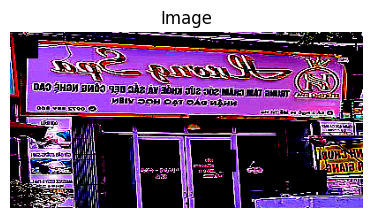

In [ ]:
root_dir = "/content"
train_dataset = CustomDataset(image_dir=f'{root_dir}/data_train/images', transform=train_transform)
test_dataset = CustomDataset(image_dir=f'{root_dir}/data_test/images', transform=test_transform)

# Tạo DataLoader cho huấn luyện và kiểm thử
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

item = 3
image = train_dataset.__getitem__(item).permute(1, 2, 0).numpy()

# Hiển thị ảnh
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis('off')
plt.show()

In [ ]:
# Đường dẫn thư mục chứa ảnh gốc và nhãn
root_dir = "/content"
image_dir = f'{root_dir}/data_train/images'
label_dir = f'{root_dir}/data_train/labels'

# Đọc danh sách tất cả các ảnh trong thư mục
images = sorted(os.listdir(image_dir))

# Tạo thêm dữ liệu tăng cường cho mỗi ảnh
for i, image_name in enumerate(images):
    if (image_name in ".ipynb_checkpoints"):
        continue
    image_path = os.path.join(image_dir, image_name)
    label_name = image_name.replace('.jpg', '.txt')  # Tạo tên file nhãn tương ứng
    label_name = label_name.replace('.png', '.txt')  # Tạo tên file nhãn tương ứng
    label_path = os.path.join(label_dir, label_name)
    # Đọc ảnh gốc
    image = cv2.imread(image_path)

    # Đọc nhãn gốc
    with open(label_path, 'r') as f:
        label_content = f.read()

    # Áp dụng biến đổi dữ liệu và tạo ra 20 ảnh tăng cường
    for j in range(20):  # Tạo 20 ảnh tăng cường từ mỗi ảnh gốc
        # Áp dụng các phép biến đổi
        transformed = train_transform(image=image)
        augmented_image = transformed["image"]

        # Lưu ảnh đã biến đổi vào thư mục mới với tên ảnh tăng cường
        augmented_image_name = image_name.replace('.jpg', f'augmented_{j}.jpg')
        augmented_image_path = os.path.join(image_dir, augmented_image_name)

        # Chuyển đổi tensor thành numpy array trước khi lưu
        augmented_image = augmented_image.permute(1, 2, 0).numpy()
        augmented_image = (augmented_image * 255).astype(np.uint8)  # Chuyển đổi giá trị về [0, 255]

        # Lưu ảnh
        cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

        # Tạo tên file nhãn mới và lưu nhãn vào thư mục tương ứng
        augmented_label_name = augmented_image_name.replace('.jpg', '.txt')
        augmented_label_path = os.path.join(label_dir, augmented_label_name)

        # Lưu lại nội dung nhãn
        with open(augmented_label_path, 'w') as f:
            f.write(label_content)

    if i % 10 == 0:
        print(f"Đã tạo và lưu 20 ảnh tăng cường cho ảnh {image_name}")

print("Tạo ảnh tăng cường hoàn tất!")

Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0001.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0011.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0021.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0031.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0041.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0051.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0061.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0071.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0081.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0091.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0101.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0111.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0121.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0131.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0141.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0151.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0162.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh IMG_0172.jpg
Đã tạo và lưu 20 ảnh tăng cường cho ảnh test_0

## Install YOLO-NAS


In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics


import ultralytics
ultralytics.checks()

Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.5/112.6 GB disk)


In [ ]:
# Chia dữ liệu thành 2 tập: train và validate
!mkdir /content/data_val
!mkdir /content/data_val/images
!mkdir /content/data_val/labels

list_train_data = list(path_data.iterdir())
len_val_data = len(list_imgs_path) // 5
list_imgs_path_val = random.sample(list_imgs_path, len_val_data)

# Chuyển một phần image, label từ tập dữ liệu train sang tập dữ liệu validate
for img_path in list_imgs_path_val:
    !mv "{img_path}" "/content/data_val/images"

    !mv "{img_path.parent.parent / 'labels' / (img_path.stem + '.txt')}" "/content/data_val/labels"


In [ ]:
# Tạo file .yaml để huấn luyện
import yaml
import os

dataset_info = {
    'train': '/content/data_train',
    'val': '/content/data_val',
    'nc': 1,
    'names': ['SignBoard']
}

yamlfile_path = './dataset_signboard.yaml'

with open(yamlfile_path, 'w') as file:
    yaml.dump(dataset_info, file, default_flow_style=None)

In [ ]:
# Huấn luyện YOLOv8n với <số epoch> epochs - có thể thay đổi số epochs cao hơn để có mô hình dự đoán tốt hơn
# !yolo train model=yolov8n.pt data=./dataset_signboard.yaml epochs=60 imgsz=640
!yolo train model=yolo11n.pt data=./dataset_signboard.yaml epochs=150 imgsz=960 batch=32 lr0=0.0005 optimizer=Adam workers=16 cache=True patience=20 cos_lr=True device=0

# !yolo train model=yolo_nas_s.pt data=./dataset_signboard.yaml epochs=150 imgsz=960 batch=32 lr0=0.0005 optimizer=Adam workers=16 cache=True patience=20 cos_lr=True device=0



100% 6.25M/6.25M [00:00<00:00, 84.3MB/s]
Ultralytics 8.3.36 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset_signboard.yaml, epochs=150, time=None, patience=20, batch=32, imgsz=960, save=True, save_period=-1, cache=True, device=0, workers=16, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labe

In [ ]:
# Kiểm tra mức độ học của mô hình qua tập dữ liệu validate ở trên
!yolo val model='/content/runs/detect/train/weights/best.pt' data='/content/dataset_signboard.yaml'

In [ ]:
from pathlib import Path
from ultralytics import YOLO
from PIL import Image, ImageDraw
from tqdm import tqdm
import os

list_data_test = list(Path("/content/data_test/images").iterdir())
labels_data_test = Path("/content/data_test/labels")
labels_data_test.mkdir(exist_ok=True)

model = YOLO("/content/runs/detect/train3/weights/best.pt")

if Path("./answer.txt").exists():
  os.remove("./answer.txt")

answer_path = Path("./answer.txt")
answer_path.touch(exist_ok=True)

for img_path in tqdm(list_data_test, desc="Processing images"):
    result = model([img_path])[0]

    boxes = result.boxes
    img = Image.open(img_path)
    img_draw = ImageDraw.Draw(img)
    width, height = img.size
    img.resize((200, 400), Image.Resampling.LANCZOS)


    with open(answer_path, "a") as file:
        for bbox in boxes:
            x, y, w, h = map(float, bbox.xywh[0].tolist())
            x /= width
            y /= height
            w /= width
            h /= height
            print(x, y, w, h)

            x_min = x - w / 2
            y_min = y - h / 2
            x_max = x + w / 2
            y_max = y + h / 2

            print(x_min, y_min, x_max, y_max)
            img1 = ImageDraw.Draw(img)
            img1.rectangle([(int(x_min * width), int(y_min * height)), (int(x_max * width), int(y_max * height))], outline="red")

            file.write(f"{img_path.stem} 0 {x} {y} {w} {h}\n")

    display(img)